<h1>Using Convolutions to Improve Accuracy in Computer Vision</h1>

In [1]:
import tensorflow as tf 

mnist = tf.keras.datasets.fashion_mnist

(trainImages, trainLabels), (testImages, testLabels) = mnist.load_data()

trainImages = trainImages/255.0
testImages = testImages/255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(trainImages, trainLabels, epochs=5)

testLoss = model.evaluate(testImages, testLabels)

Epoch 1/5
1875/1875 [==============================] - 8s 3ms/step - loss: 0.4971 - accuracy: 0.8262
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3738 - accuracy: 0.8653
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3354 - accuracy: 0.8772
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3113 - accuracy: 0.8872
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3472 - accuracy: 0.8740


Using a regular NN we get 89% accuracy on the training set and 87% on the validation set. Next we're going to see how this metrics can be improved by using Convolutional Neural Networks.

<h1>Convolution</h1>

Convolution is the process of adding each element of the image to its local neighbors, weighted by the kernel.

In computer vision, convolutions highlight the most distinguishing features from an image, reducing the amount of information to be analyzed. The training is performed on these highlighted features, increasing the performance.

Add some layers to do convolution before you have the dense layers, and then the information going to the dense layers is more focussed, and possibly more accurate. We're going to use the same NN as earlier, but this time starting with Convolutional layers to see how it impacts on the accuracy.


In [4]:
import tensorflow as tf

mnist = tf.keras.datasets.fashion_mnist

(trainImages, trainLabels), (testImages, testLabels) = mnist.load_data()

trainImages = trainImages.reshape(60000, 28, 28, 1)
trainImages = trainImages/255.0

testImages = testImages.reshape(10000, 28, 28, 1)
testImages = testImages/255.0

#Validation samples
xVal = trainImages[-10000:]
yVal = trainLabels[-10000:]

trainImages = trainImages[:-10000]
trainLabels = trainLabels[:-10000]

<h3>Preparing Data</h3>

In the snippet above we're gathering the data. The input training data needs to be reshaped beause the first convolution expects a single tensor containing all the data at once. Then we must reshape the training and test data into 4 dimensional lists, 60000x28x28x1 and 10000x28x28x1 respectively. 

```python
    trainImages = trainImages.reshape(60000, 28, 28, 1)
    testImages = testImages.reshape(10000, 28, 28, 1)
```
We also separate our data into validation samples.
<br/>


<h3>Building a Convolutional Model</h3>

Next is to define our model. Now instead of the input layer at the top, we're going to add a Convolution. The parameters are:

<ol>
<li>The number of convolutions to be generated. Purely arbitrary, but good to start with something in the order of 32</li>
<li>The size of the Convolution, in this case a 3x3 grid</li>
<li>The activation function to use -- in this case we'll use reLU, which returns x when x>0, else it returns 0</li>
<li>In the first layer, the shape of the input data.</li>
</ol>

The second layer is a MaxPooling Layer designed to compress the image while maintining the content of the highlighted features from the convolution. When we specify (2,2) for the MaxPooling, the output is a quarter of the size of the image. It creates a 2x2 array of pixels and selects the biggest one, thus turning 4 pixels into 1. This process is repeated across the whole image, then it halves the number of horizontal and vertical pixels, effectively reducing the image by 25%.

By calling model.summary() the size and shape of the network are displayed. We can see that the image size is reduced after every MaxPooling layer.

After two convolutions, we flatten the output and use the same Deep Neural Network structure as before.


In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])    

<h3>Training and Evaluation</h3>

Now we compile the model, call the fit method to the training, and evaluate the loss and accuracy from the test set. 
 
A plotting function is defined to display detailed results using Matplotlib.

In [8]:
import matplotlib.pyplot as plt

def showTrainingHistory(h):
    
    plt.figure(1)
    # summarize history for accuracy
    plt.subplot(211)
    plt.plot(h.history['accuracy'])
    plt.plot(h.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc='lower right')

    # summarize history for loss
    plt.subplot(212)
    plt.plot(h.history['loss'])
    plt.plot(h.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc='upper right')

    plt.tight_layout()

    plt.show()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

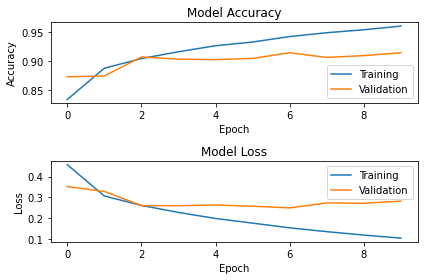

313/313 [==============================] - 4s 12ms/step - loss: 0.3001 - accuracy: 0.9100


In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(trainImages, trainLabels, epochs=10, validation_data=(xVal, yVal))

showTrainingHistory(history)

testLoss, testAcc = model.evaluate(testImages, testLabels)

Now our model's accuracy has increased to 96% on the training data and around 91% on the validation data. 

<h2>Visualizing the Convolutions and Pooling</h2>

The next code will show us the convolutions graphically. The `print(testLabels[:100])` shows us the first 100 labels in the test set, and you can see that the ones at index 0, index 23 and index 28 are all the same value (9). They're all shoes. Let's take a look at the result of running the convolution on each,then common features between them will emerge. Now, when the DNN is training on that data, it's working with a lot less, and it's perhaps finding a commonality between shoes based on this convolution/pooling combination.

In [12]:
print(testLabels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


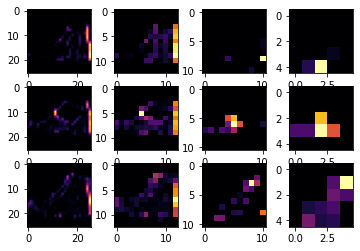

In [15]:
f, axarr = plt.subplots(3, 4)

FIRST_IMAGE = 0
SECOND_IMAGE = 23
THIRD_IMAGE = 28
CONVOLUTION_NUMBER = 1

from tensorflow.keras import models

layerOutputs = [layer.output for layer in model.layers]

activationModel = tf.keras.models.Model(inputs = model.input, outputs = layerOutputs)

for i in range(0, 4):
    f1 = activationModel.predict(testImages[FIRST_IMAGE].reshape(1, 28, 28, 1))[i]
    axarr[0, i].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0, i].grid(False)

    f2 = activationModel.predict(testImages[SECOND_IMAGE].reshape(1, 28, 28, 1))[i]
    axarr[1, i].imshow(f2[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1, i].grid(False)

    f3 = activationModel.predict(testImages[THIRD_IMAGE].reshape(1, 28, 28, 1))[i]
    axarr[2, i].imshow(f3[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2, i].grid(False)
